# 다변수 이산확률변수의 결합/조건부확률

In [9]:
from scipy.stats import norm

import numpy as np
import scipy as sp
from pandas.core import datetools as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl

mpl.use('Agg')
import matplotlib.pylab as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()



C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


* 다변수 이산확률변수의 결합확률
* 다변수 이산확률변수의 주변확률
* 다변수 이산확률변수의 조건부확률

## 다변수 이산확률변수

카테고리 값을 가질 수 있는 이산확률변수가 두 개 이상 있는 경우에는 각각의 확률변수에 대한 확률분포 이외에도 확률분포 쌍이 가지는 복합적인 확률분포를 살펴보아야 한다.

예를 들어 1부터 6까지의 값을 가지는 카테고리 분포 확률변수 $X$와 $Y$를 생각하자. 확률변수 각각의 확률적 특성은 확률질량함수(pmf) $ P_X(x), P_Y(y) $로 나타낼 수 있다. 확률질량함수의 아랫 첨자로 확률변수 이름을 지정하여 어떤 확률 변수의 확률밀도함수인지 표시한다.

확률밀도함수의 독립변수 $x$는 나타낼 수 있는 어떤 숫자, 종속변수 $P$는 그 숫자가 나타날 확률이다. 즉 $P_X(x=1)$ 또는 $P_X(1)$은 확률변수 $X$의 값이 1이 나올 확률이다.

## 결합 확률질량함수

이번에는 하나의 값이 아닌 두 개의 값, 즉 특정한 숫자 쌍이 나타나는 경우를 생각하자. 단변수 이산확률변수에서와 마찬가지로 하나의 숫자 쌍만을 가지는 사건,즉 아톰(atom) 사건에 대한 확률만 알고 있으면 임의의 숫자 쌍 집합 즉, 임의의 사건에 대해서도 확률을 계산할 수 있으므로 하나 하나의 숫자 쌍에 대해 확률을 알려주는 확률질량함수만 있으면 전체 확률분포를 알 수 있다. 이러한 확률질량함수를 결합 확률질량함수(joint probability mass function)이라고 하며 다음과 같이 표시한다.

$$ P_{XY}(x, y) $$

이 때는 나타날 수 있는 숫자가 두 숫자로 이루어진 쌍이므로 독립변수가 $x,y$ 두 개가 된다. 종속변수는 그 숫자 쌍이 나타날 확률이다. 즉, $P_{XY}(2, 3)$은 $(x=2, y=3)$이라는 특정한 숫자 쌍으로만 이루어진 사건의 확률이다.

다음은 6개의 카테고리 값을 가지는 두 개의 이산확률변수의 확률질량함수의 한 예이다.

In [2]:
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 6, 4, 1, 0],
                [0, 1, 4, 6, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.08,  0.12,  0.08,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.08,  0.12,  0.08,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.06,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.02]])

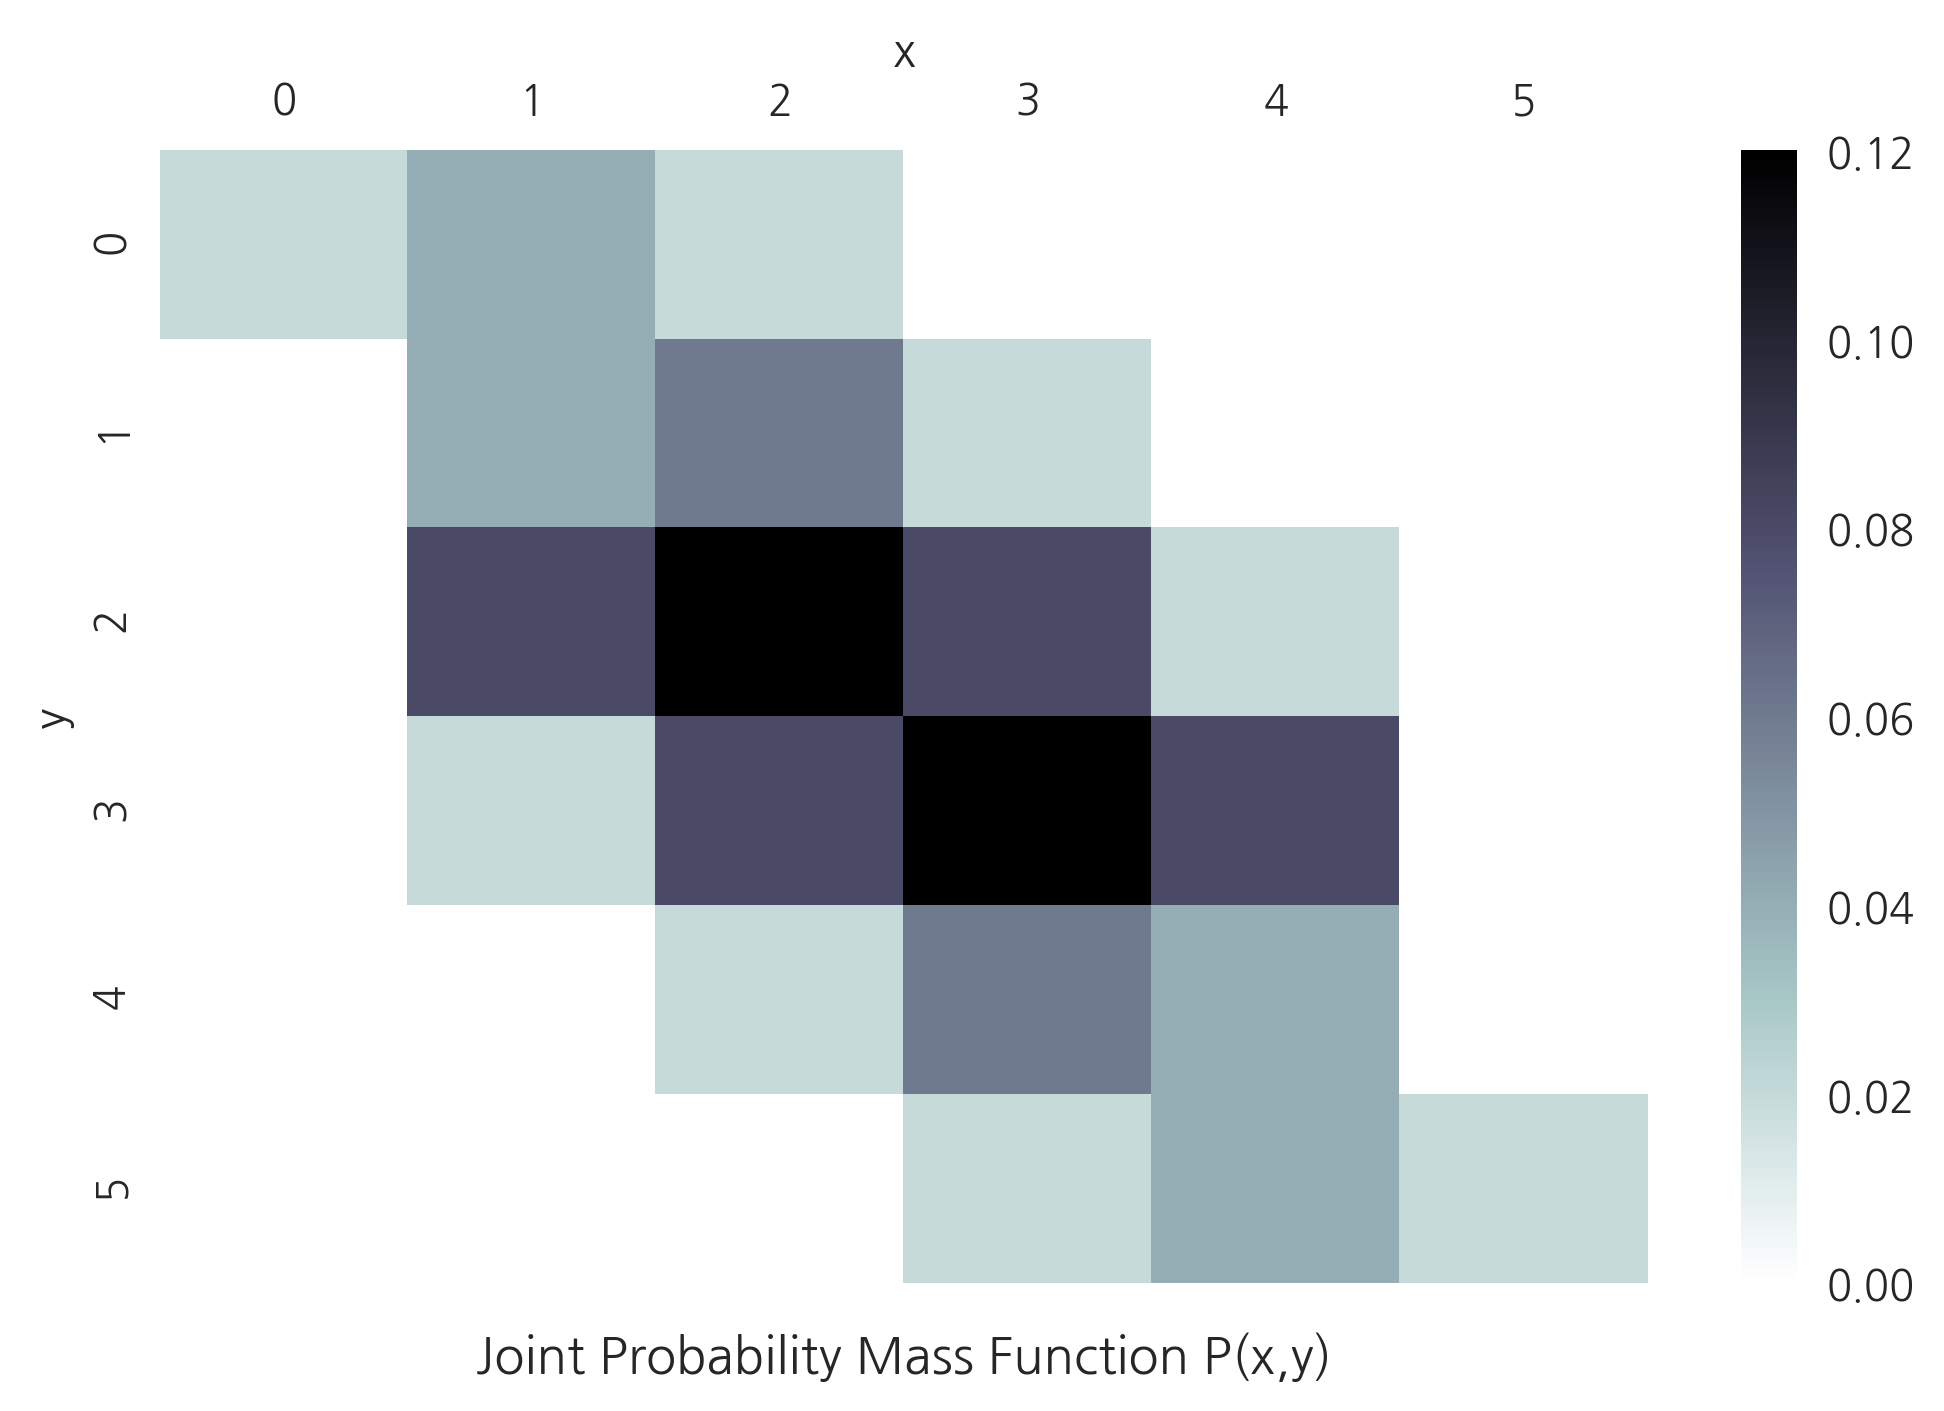

In [4]:
ax = sns.heatmap(pmf, cmap=mpl.cm.bone_r)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function P(x,y)", y=-0.1)
plt.show()

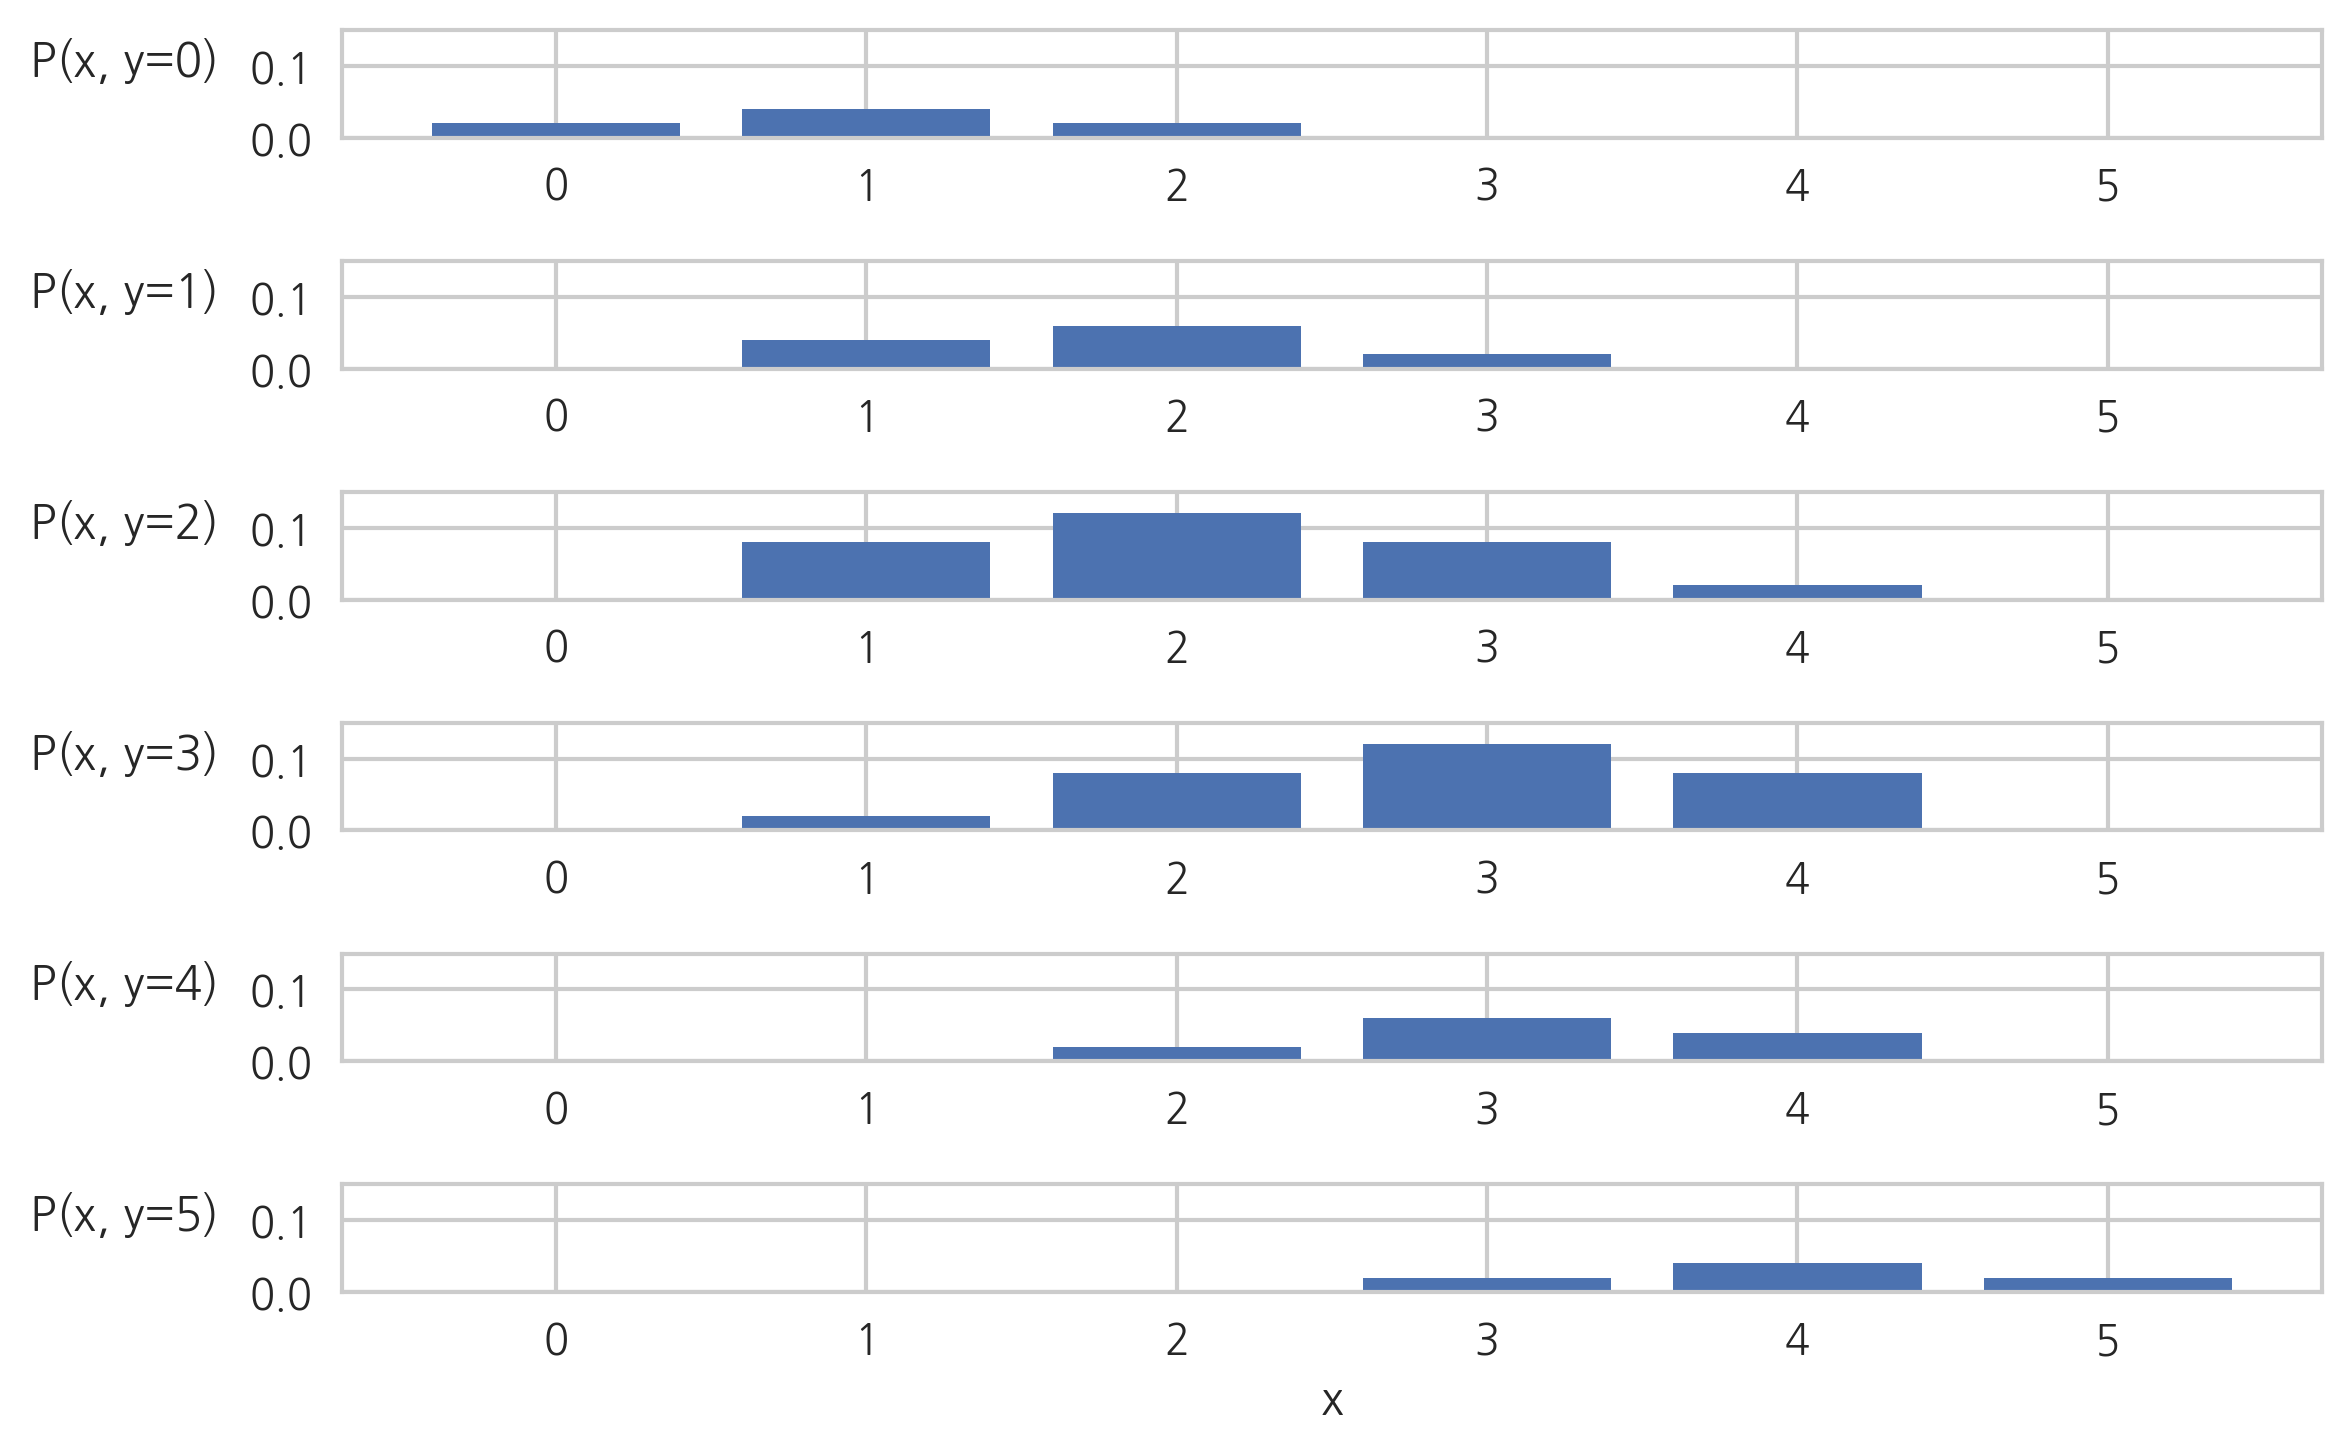

In [7]:
x = np.arange(6)
plt.subplot(611); plt.bar(x, pmf[0, :]); plt.ylabel("P(x, y=0)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(612); plt.bar(x, pmf[1, :]); plt.ylabel("P(x, y=1)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(613); plt.bar(x, pmf[2, :]); plt.ylabel("P(x, y=2)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(614); plt.bar(x, pmf[3, :]); plt.ylabel("P(x, y=3)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(615); plt.bar(x, pmf[4, :]); plt.ylabel("P(x, y=4)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(616); plt.bar(x, pmf[5, :]); plt.ylabel("P(x, y=5)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xlabel("x")
plt.tight_layout()
plt.show()

In [3]:
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 6, 4, 1, 0],
                [0, 1, 4, 6, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.08,  0.12,  0.08,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.08,  0.12,  0.08,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.06,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.02]])

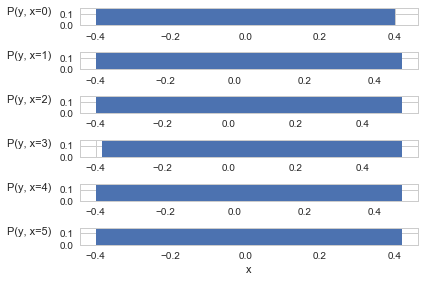

In [20]:

import matplotlib.pylab as plt ## 미나 답안 y가 고정일때 X가 변하면서 나타내는 종속변수의 값(확률)
%matplotlib inline

y = np.arange(6)
plt.subplot(611); plt.bar(pmf[:, 0], y); plt.ylabel("P(y, x=0)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(612); plt.bar(pmf[:, 1], y); plt.ylabel("P(y, x=1)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(613); plt.bar(pmf[:, 2], y); plt.ylabel("P(y, x=2)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(614); plt.bar(pmf[:, 3], y); plt.ylabel("P(y, x=3)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(615); plt.bar(pmf[:, 4], y); plt.ylabel("P(y, x=4)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.subplot(616); plt.bar(pmf[:, 5], y); plt.ylabel("P(y, x=5)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xlabel("x")
plt.tight_layout()
plt.show()

#### 연습 문제 1

1. 이 확률변수의 값이 (5,5)일 확률을 구하라.
1. 이 확률변수의 값이 (5,0)일 확률을 구하라.

## 주변 확률질량함수

**주변 확률질량함수(marginal probability mass function)**는 두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수이다. 즉 다변수가 되기 이전의 단변수 확률질량함수를 말한다.

결합 확률질량함수에서 주변 확률질량함수를 구하려면 전체 확률의 법칙에 의해 다른 변수가 가질 수 있는 모든 값의 결합확률질량함수를 합한 확률이 된다.

$$ 
\begin{align}%\label{}
\nonumber  P_X(x) = \sum_{y_i} f_{XY}(x,y_i) \\
\nonumber  P_Y(y) = \sum_{x_i} f_{XY}(x_i,y) \\
\end{align} 
$$

위에서 예로 든 이산 확률 변수의 경우에 주변 확률 질량 함수를 계산하면 다음과 같다.

$$ P_X(0) = P_{XY}(0,0) + P_{XY}(0,1) + P_{XY}(0,2) + P_{XY}(0,3) + P_{XY}(0,4) + P_{XY}(0,5) = 0.02 $$ 
$$ P_X(1) = P_{XY}(1,0) + P_{XY}(1,1) + P_{XY}(1,2) + P_{XY}(1,3) + P_{XY}(1,4) + P_{XY}(1,5) = 0.18 $$
$$ \vdots $$


In [9]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

array([ 0.02,  0.18,  0.3 ,  0.3 ,  0.18,  0.02])

In [10]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[ 0.08],
       [ 0.12],
       [ 0.3 ],
       [ 0.3 ],
       [ 0.12],
       [ 0.08]])

## 조건부 확률질량함수

조건부 확률질량함수(conditional probability mass function)는 다변수 확률변수 중 하나의 값이 특정 값으로 고정되어 상수가 되어 버린 경우, 나머지 변수에 대한 확률질량함수를 말한다. 조건부 확률질량함수는 다음과 같이 정의된다.


$$ P_{X \mid Y}(x \mid y) = \dfrac{P_{XY}(x, y)}{P_{Y}(y)} $$

$$ P_{Y \mid X}(y \mid x) = \dfrac{P_{XY}(x, y)}{P_{X}(x)} $$


조건부 확률질량함수의 모양은 결합질량함수 $P_{XY}(x, y)$에서 $y$값이 고정된 함수, 즉, 결합질량함수의 단면과 같아진다.

다만 조건부 확률질량함수의 합은 1이 된다.

위에서 예로 든 이산 확률 변수의 경우에 조건부 확률 질량 함수를 계산하면 다음과 같다.

In [11]:
pmf[0, :]

array([ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ])

In [12]:
np.sum(pmf[0, :])

0.080000000000000002

In [13]:
cond_y0 = pmf[0, :]/pmf_marginal_y[0]
cond_y0

array([ 0.25,  0.5 ,  0.25,  0.  ,  0.  ,  0.  ])

In [14]:
np.sum(cond_y0)

1.0

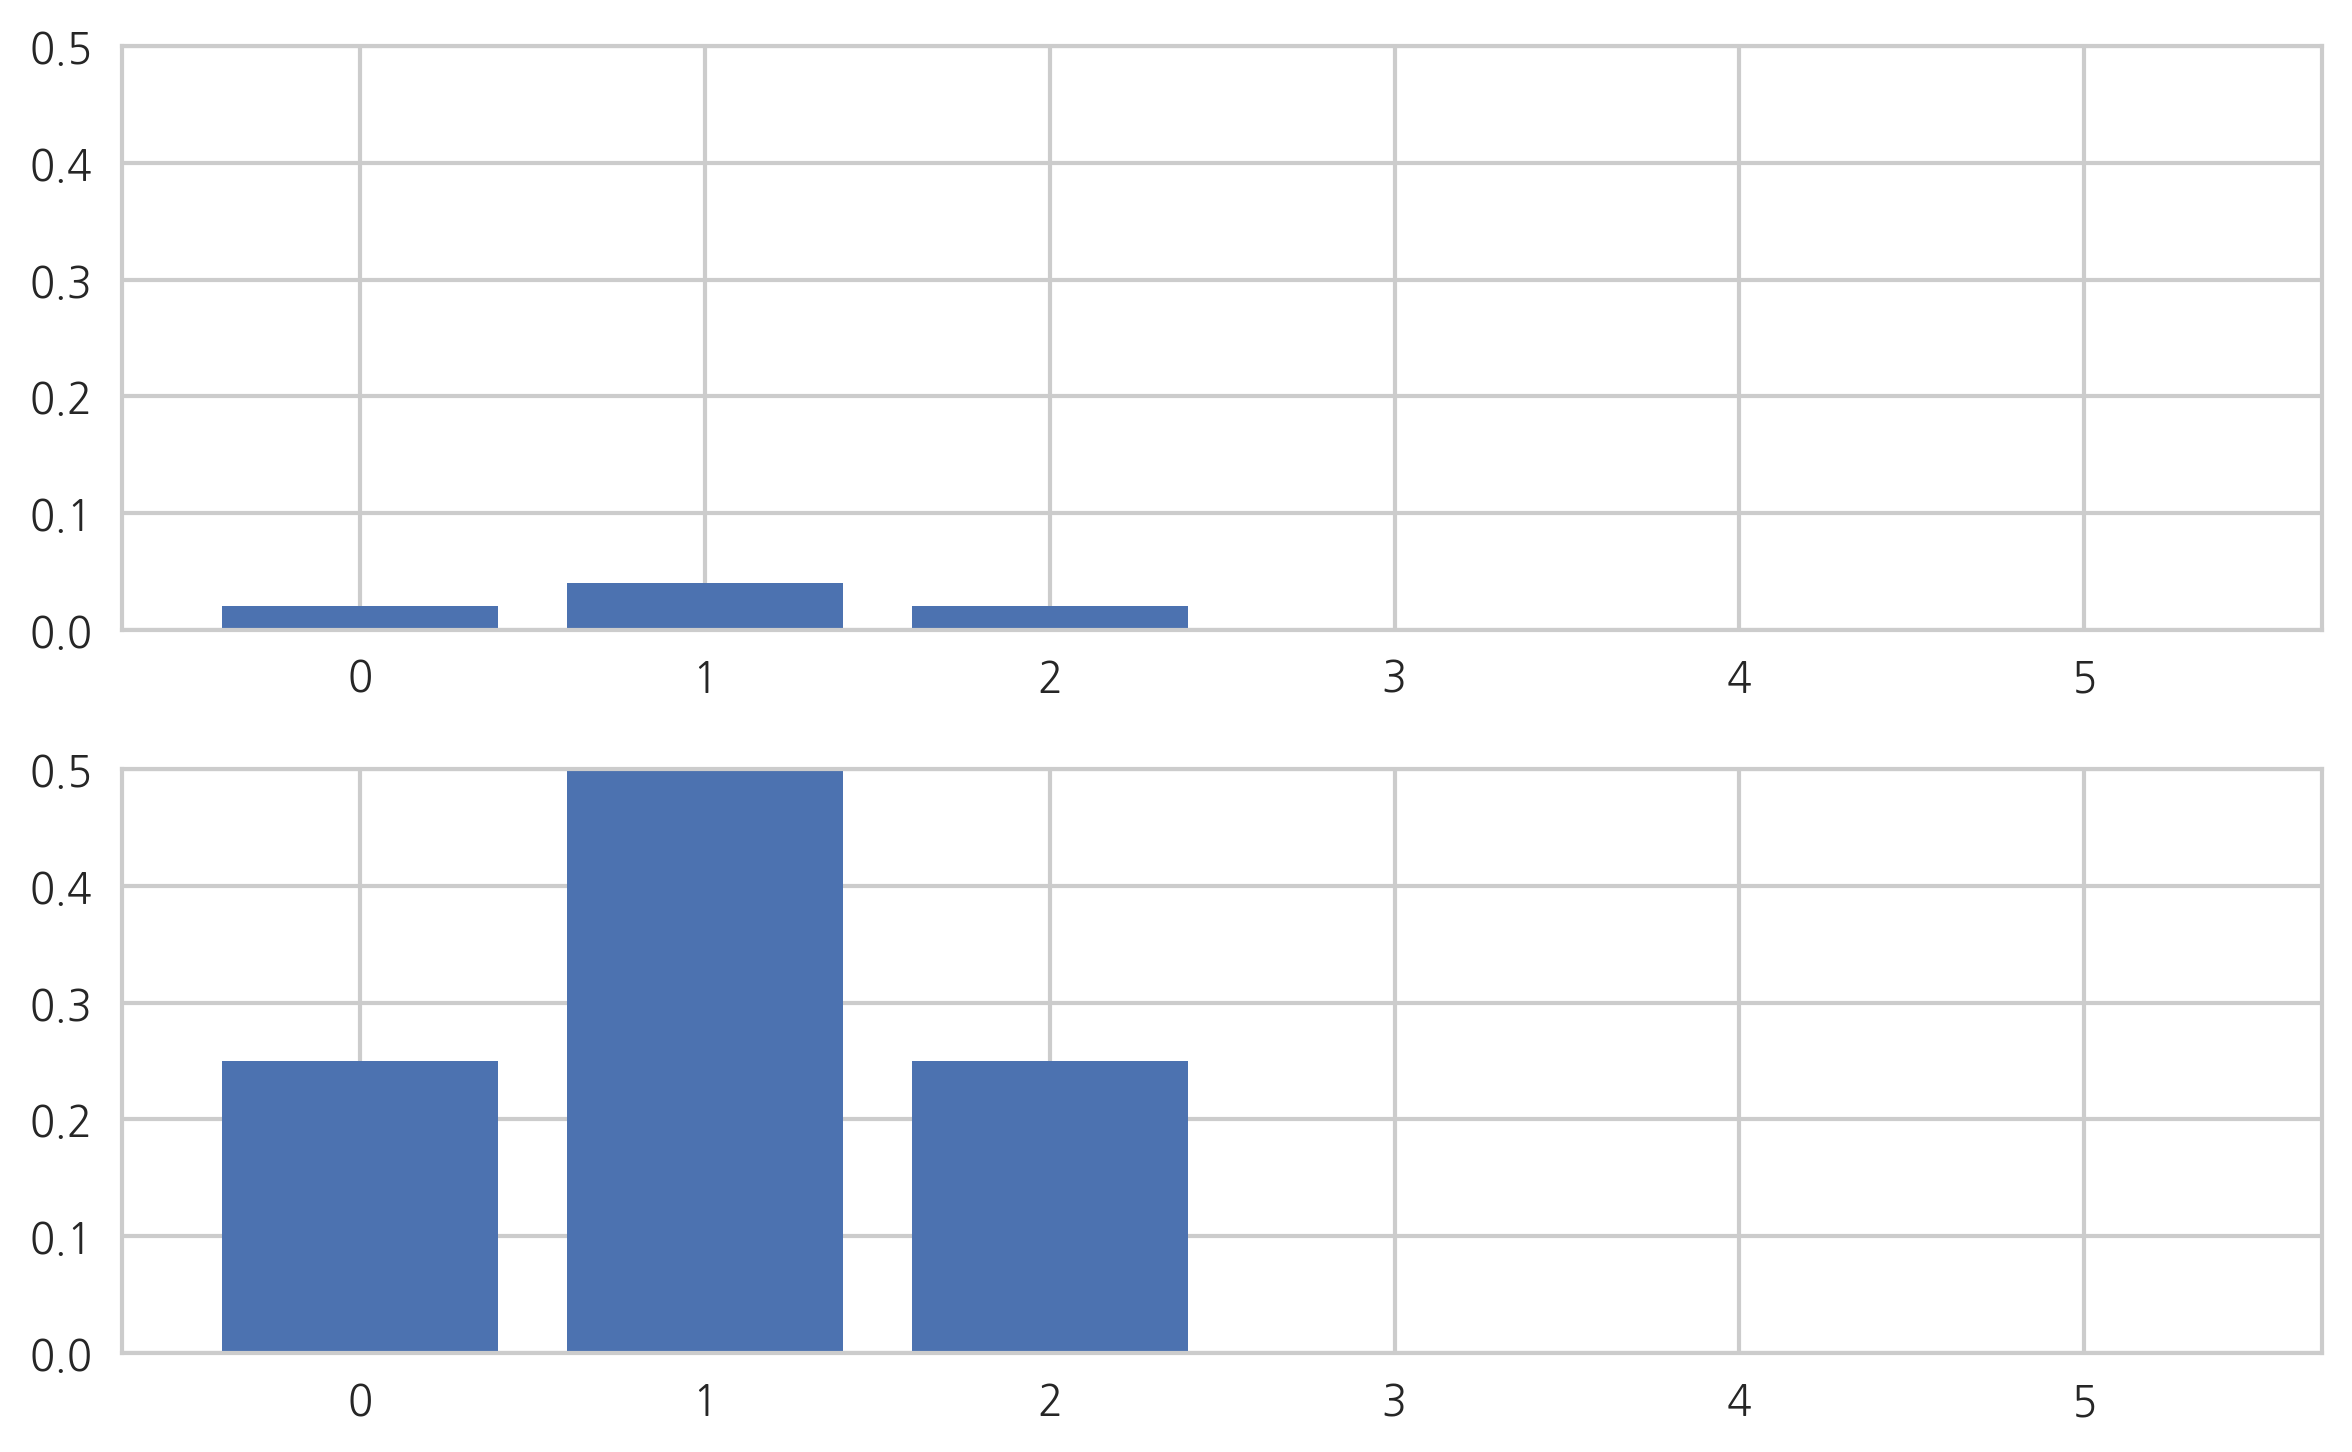

In [15]:
plt.subplot(211); plt.bar(x, pmf[0, :]); plt.ylim(0, 0.5)
plt.subplot(212); plt.bar(x, cond_y0); plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

In [16]:
pmf[1, :]

array([ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ])

In [17]:
np.sum(pmf[1, :])

0.12000000000000001

In [18]:
cond_y1 = pmf[1, :]/pmf_marginal_y[1]
cond_y1

array([ 0.        ,  0.33333333,  0.5       ,  0.16666667,  0.        ,  0.        ])

In [19]:
np.sum(cond_y1)

0.99999999999999989

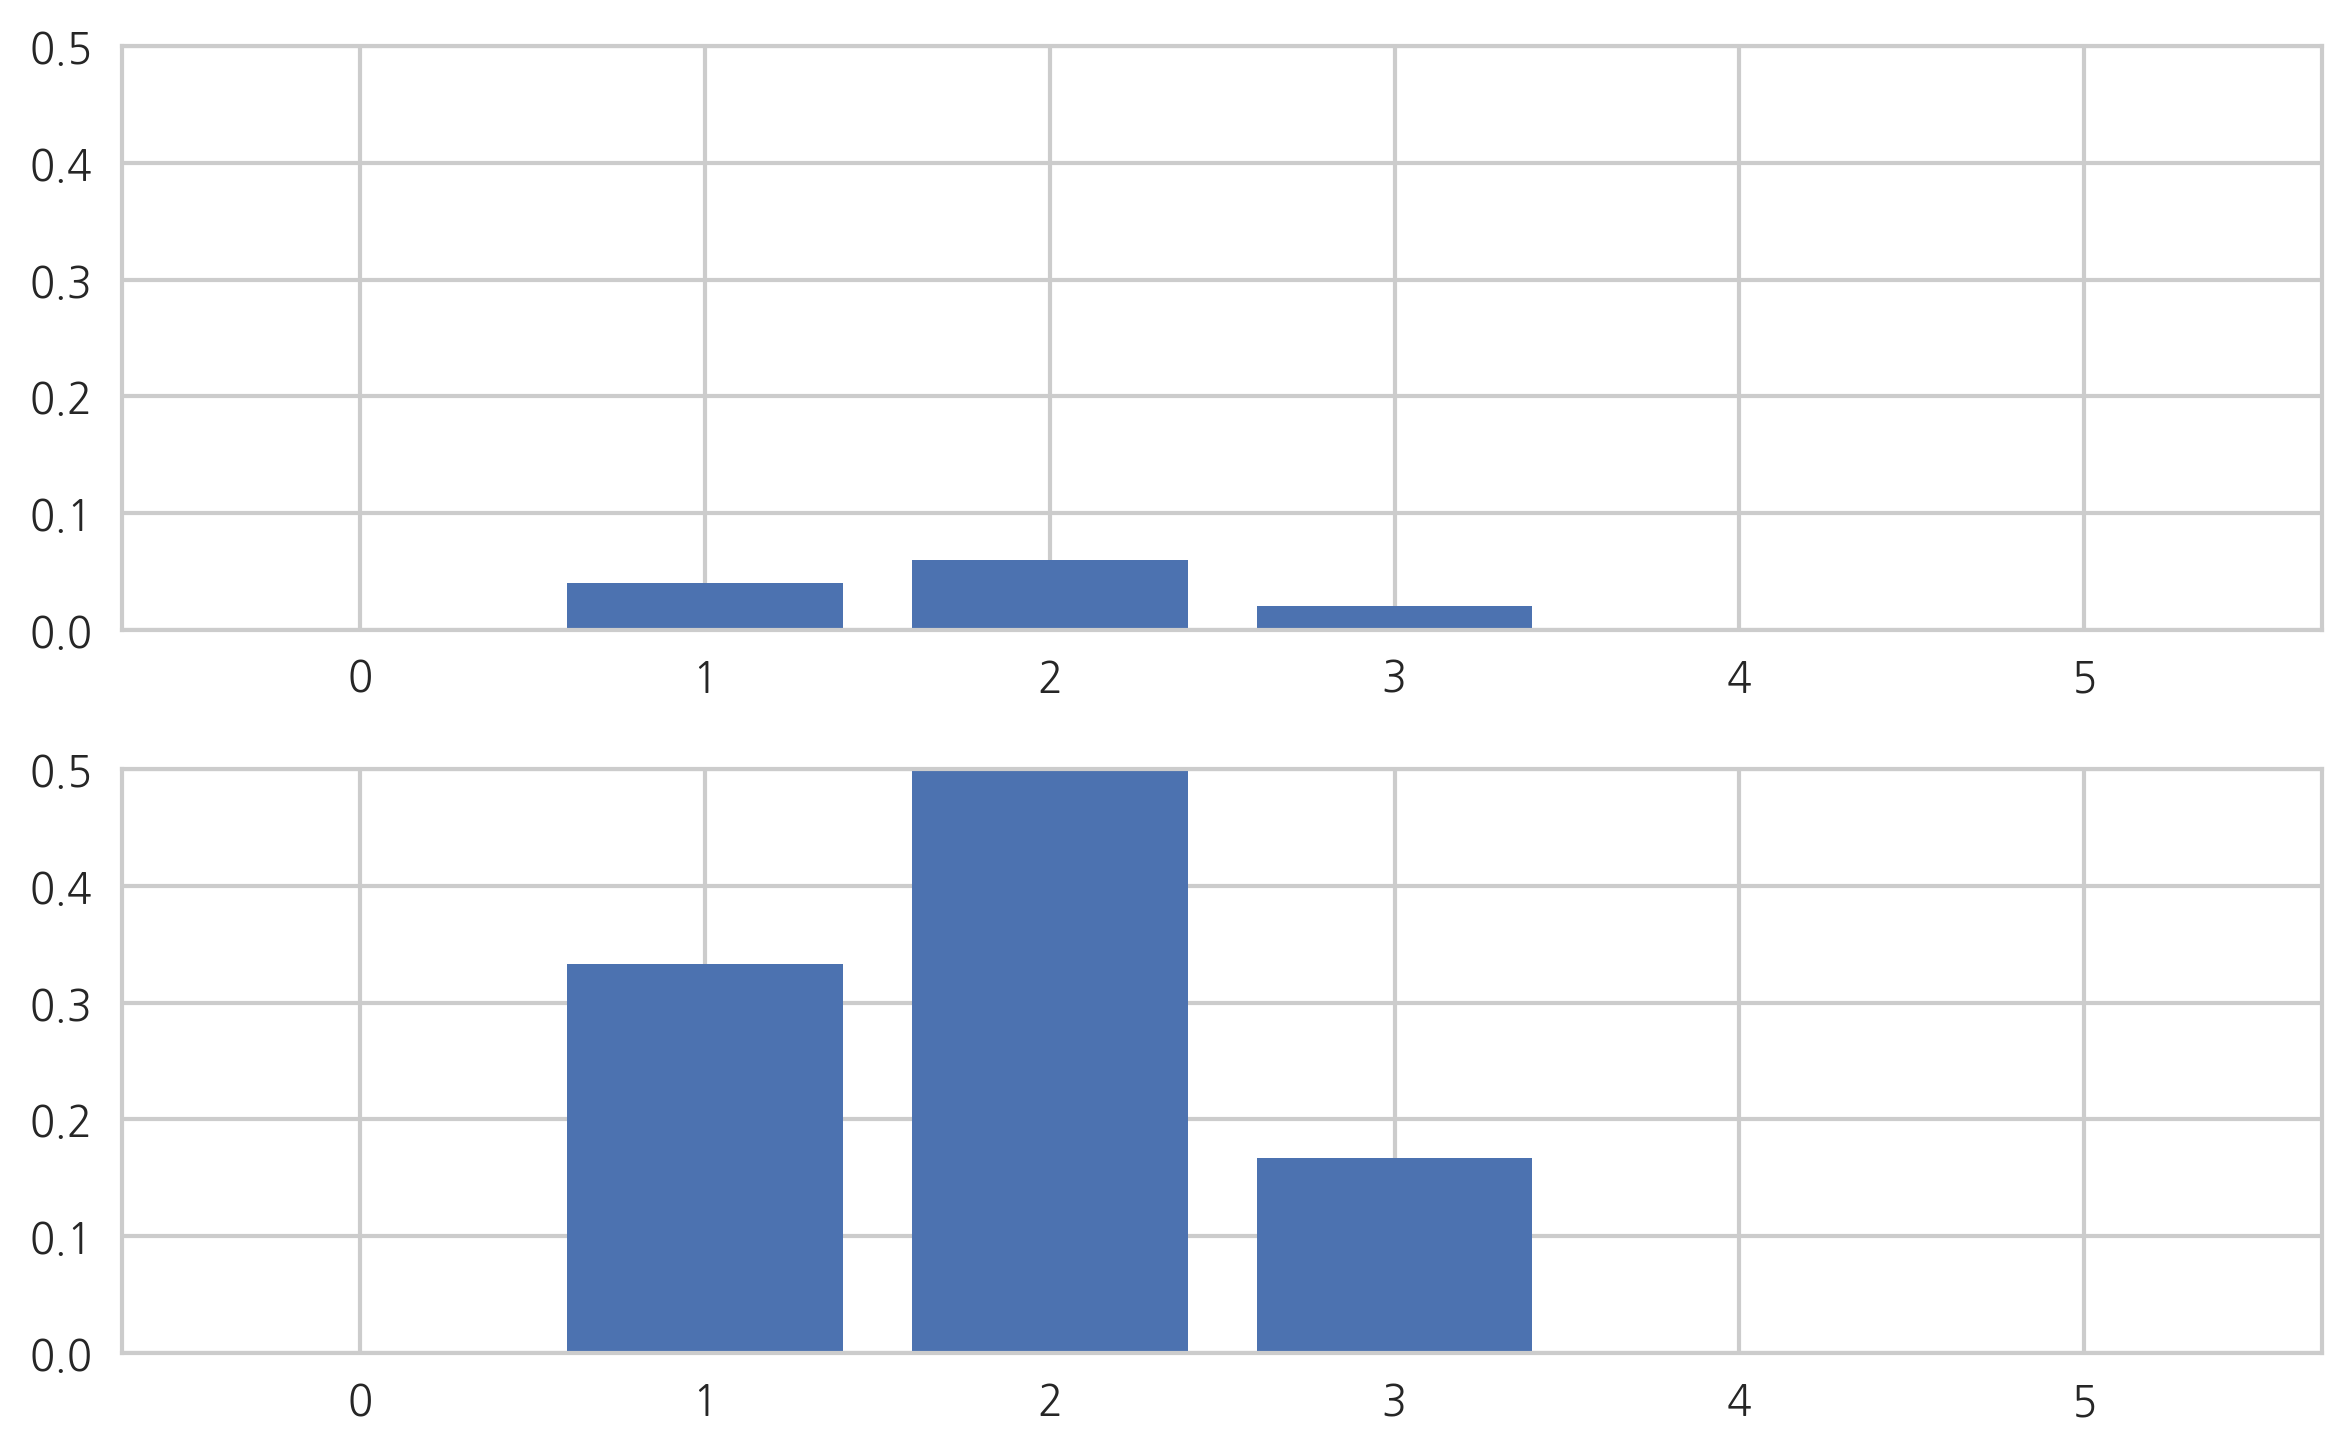

In [20]:
y = np.arange(6)
plt.subplot(211); plt.bar(y, pmf[1, :]); plt.ylim(0, 0.5)
plt.subplot(212); plt.bar(y, cond_y1); plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()